In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import shapely
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import MultiPoint

In [57]:
polygon_coords = [(0.5,0.5),(1,2.5),(2.5,4),(3,3),(2.5,2.5),(3.5,1),(2.5,0),(2,2),(1.5,1),(0.5,0.5)]
polygon = Polygon(polygon_coords)

def get_true_label(point):
    label = 0
    if Point(point).within(polygon):
        label = 1
    return label

In [58]:
def generate_grid_points(count_per_side):
    size_x = 4
    size_y = 4
    xs = np.linspace(0,size_x, count_per_side)
    ys = np.linspace(0,size_y, count_per_side)
    xv, yv = np.meshgrid(xs, ys)
    points = np.array(np.zeros(shape=(3,xv.flatten().shape[0]), dtype=float))
    points[0] = xv.flatten()
    points[1] = yv.flatten()
    return points

def get_grid_points_with_labels(count_per_side, label_func):
    points = generate_grid_points(count_per_side)
    labels = []
    for i in range(len(points[0])):
        point = np.array([points[0][i], points[1][i]])
        label = label_func(point)
        points[2,i] = label
        labels.append(label)

    #points[2] = np.array(labels)
    return points

In [59]:
def step_func(x):
    if x <= 0:
        return 0
    else:
        return 1

def identity(x):
    return x

def perceptron(x, w, b):
    return step_func(x*w + b)

In [60]:
class Neuron:
    def __init__(self, activation_func, input_dims):
        self.act_func = activation_func
        self.in_dims = input_dims
        self.w = np.random.rand(input_dims,)
        self.b = np.random.randn()
    
    def set_to_AND(self):
        self.w = np.ones((self.in_dims,), dtype=np.int)
        self.b = -self.in_dims + 1
    
    def set_to_OR(self):
        self.w = np.ones((self.in_dims,), dtype=np.int)
        self.b = 0
        
    def out(self, x):
        return self.act_func(np.dot(x,self.w) + self.b)
    
class Layer:
    def __init__(self, no_neurons, activation_func, input_dims):
        self.neurons = [Neuron(activation_func, input_dims) for i in range(no_neurons)]
    
    def out(self, x):
        return np.array([n.out(x) for n in self.neurons])


class Network:
    def __init__(self):
        self.layers = []
    
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def out(self, x):
        layer_output = x
        for layer in self.layers:
            layer_output = layer.out(layer_output)
        return layer_output
    
    def list_layers(self):
        for layer in self.layers:
            print(len(layer.neurons), "neurons")
    
    def plot(self):
        points = get_grid_points_with_labels(100, self.out)
        plt.scatter(points[0],points[1],c=points[2])
        plt.show()

In [61]:
net = Network()
net.add_layer(Layer(no_neurons=1, activation_func=step_func, input_dims=2))
#net.add_layer(Layer(no_neurons=1, activation_func=step_func, input_dims=2))
net.list_layers()

1 neurons


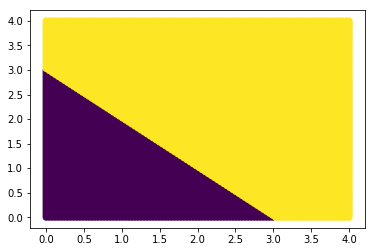

In [74]:
neuron = net.layers[0].neurons[0]
neuron.b = -3
neuron.w = np.array([1,1])
net.plot()